# Breast-Cancer-Wisconsin

![Breast-Cancer-Wisconsin](canser.png)


## Table of contents 
1. [Introduction](#Introduction)
1. [Loading and Exploring the Dataset](#Loading)
3. [Data Wrangling](#Wrangling)
4. [Correct Incosistencies in Data](#Correct)
5. [detectoutliersbyboxplotvisualization](#detect)
6. [model](#model) 


<a id='Introduction'></a>
## 1. Introduction

<a id='Introduction'></a>


 This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).


<a id='Loading'></a>
## 2. Loading and Exploring the Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [2]:
df=pd.read_csv("breast-cancer-wisconsin.data")

In [3]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


# Data Wrangling
<a id='Wrangling'></a>


In [4]:
import warnings
warnings.simplefilter("ignore")

In [5]:
df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
df.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df.isna().sum()


1000025    0
5          0
1          0
1.1        0
1.2        0
2          0
1.3        0
3          0
1.4        0
1.5        0
2.1        0
dtype: int64

<div id="Correct">
    <h2>Correct Incosistencies in Data</h2>
</div>


Below we will correct some of the inconsistencies in the data:

- data has duplicated values(9)
- name of columns must be changed to understand 
- column(Bare Nuclei )should be change to int
- also, column (Bare Nuclei)has wrong value is ? should change


In [8]:
df.rename(columns = {'1000025' : 'Sample code number',
                          '5' : 'Clump Thickness',
                          '1': 'Uniformity of Cell Size',
                          '1.1' :'Uniformity of Cell Shape',
                          '1.2' :'Marginal Adhesion',
                          '2' :'Single Epithelial Cell Size',
                          '1.3':'Bare Nuclei',
                          '3' :'Bland Chromatin ',
                          '1.4':'Normal Nucleoli',
                          '1.5' :'Mitoses',
                          '2.1':'Class:'}, inplace=True)

In [9]:
df.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin ',
       'Normal Nucleoli', 'Mitoses', 'Class:'],
      dtype='object')

In [10]:
df.drop('Sample code number',axis=1,inplace=True)

In [11]:
#to get Unique Values
for col in  df.columns :
    print("Unique Values in {} : {} ".format(col,df[col].unique()))
    print('-------------------------------------------------------------------------------------------------')

Unique Values in Clump Thickness : [ 5  3  6  4  8  1  2  7 10  9] 
-------------------------------------------------------------------------------------------------
Unique Values in Uniformity of Cell Size : [ 4  1  8 10  2  3  7  5  6  9] 
-------------------------------------------------------------------------------------------------
Unique Values in Uniformity of Cell Shape : [ 4  1  8 10  2  3  5  6  7  9] 
-------------------------------------------------------------------------------------------------
Unique Values in Marginal Adhesion : [ 5  1  3  8 10  4  6  2  9  7] 
-------------------------------------------------------------------------------------------------
Unique Values in Single Epithelial Cell Size : [ 7  2  3  1  6  4  5  8 10  9] 
-------------------------------------------------------------------------------------------------
Unique Values in Bare Nuclei : ['10' '2' '4' '1' '3' '9' '7' '?' '5' '8' '6'] 
------------------------------------------------------------

In [12]:
#to get sample oF data
df.sample()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
663,3,1,1,3,2,1,2,1,1,2


In [13]:
df['Bare Nuclei'].value_counts()

1     401
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [14]:
df['Bare Nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [15]:
df['Bare Nuclei'].replace('?','1',inplace=True)
df['Bare Nuclei']=df['Bare Nuclei'].astype(int)

In [16]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class:
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


<div id="detect">
    <h2>detect outliers by boxplot visualization</h2>
</div>

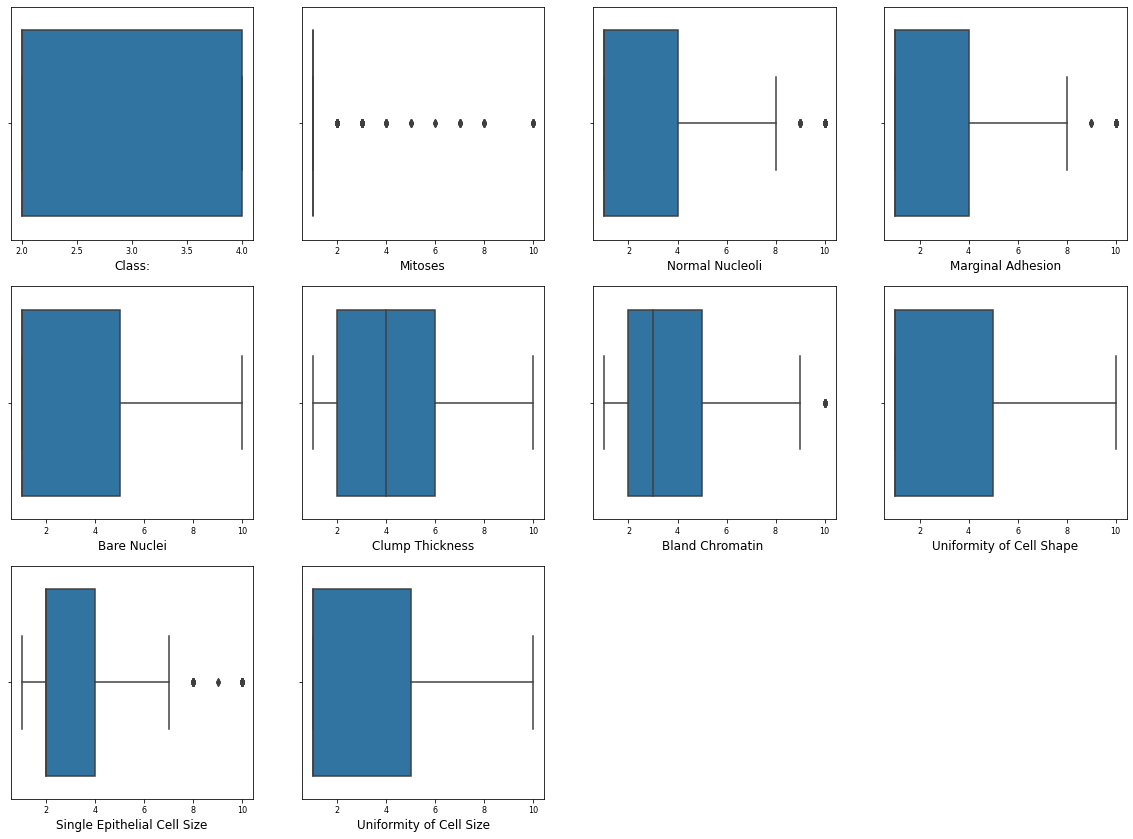

In [17]:
# detect outliers by boxplot visualization
plt.figure(figsize=(20,30))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(6,4,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=8)

In [18]:
# Function to detect outliers in every feature and fix it
def detect_outliers(df):
    outliers= pd.DataFrame(columns=["Feature","NO Outliers","Handled?"])
    for col in df.columns:
        #Return values at the given quantile
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        N_O_O = df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]
                   
        df.loc[(df[col] < fence_low),col] = fence_low
        df.loc[(df[col] > fence_high),col] = fence_high
        #let's fix them
        outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
    return outliers
detect_outliers(df)

,Feature,NO Outliers,Handled?
0,Clump Thickness,0,True
1,Uniformity of Cell Size,0,True
2,Uniformity of Cell Shape,0,True
3,Marginal Adhesion,60,True
4,Single Epithelial Cell Size,54,True
5,Bare Nuclei,0,True
6,Bland Chromatin,20,True
7,Normal Nucleoli,77,True
8,Mitoses,120,False
9,Class:,0,True


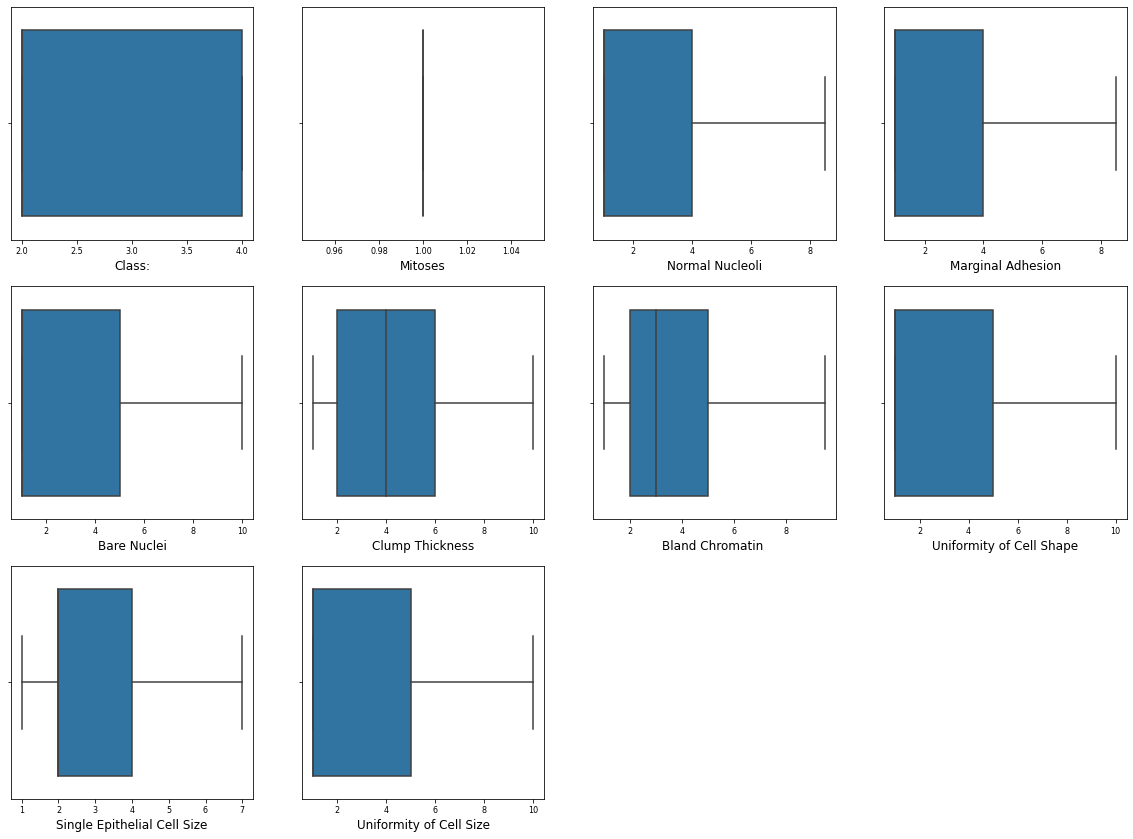

In [19]:
# detect outliers by boxplot visualization
plt.figure(figsize=(20,30))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(6,4,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=8)


<div id="model">
    <h2>model</h2>
</div>

###  the K-Nearest Neighbors algorithm.

![the K-Nearest Neighbors algorithm](photo1664385362.jpeg)

K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

# Feature set


In [32]:
X = df[['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin ', 'Normal Nucleoli', 'Mitoses']]
X[0:5]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
1,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
2,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
3,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
4,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0


In [33]:
y = df['Class:'].values
y[0:5]

array([2., 2., 2., 2., 4.])

## Normalize Data

In [34]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(int))
X[0:5]

array([[ 0.20709025,  0.28273919,  0.26572479,  0.90221537,  2.22546759,
         1.79800073, -0.17662953, -0.26563683,  0.        ],
       [-0.50322422, -0.7007423 , -0.74412585, -0.65849424, -0.59066072,
        -0.41151425, -0.17662953, -0.63098562,  0.        ],
       [ 0.56224749,  1.59404784,  1.61219231, -0.65849424, -0.02743506,
         0.14086449, -0.17662953,  1.56110709,  0.        ],
       [-0.14806699, -0.7007423 , -0.74412585,  0.12186056, -0.59066072,
        -0.68770363, -0.17662953, -0.63098562,  0.        ],
       [ 1.27256197,  2.24970216,  2.28542607,  2.07274757,  2.22546759,
         1.79800073,  2.32243962,  1.56110709,  0.        ]])

# Train Test Split


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (558, 9) (558,)
Test set: (140, 9) (140,)


<div id="classification">
    <h2>Classification</h2>
</div>


<h3>K nearest neighbor (KNN)</h3>


#### Import library


In [36]:
from sklearn.neighbors import KNeighborsClassifier

### Training with k=4:



In [37]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting



In [38]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([4., 2., 4., 2., 4.])

### Accuracy evaluation


In [39]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9731182795698925
Test set Accuracy:  0.9714285714285714


## Case at K=6



In [40]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))


Train set Accuracy:  0.9659498207885304
Test set Accuracy:  0.9785714285714285


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [41]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.98571429, 0.95714286, 0.98571429, 0.97142857, 0.97857143,
       0.97857143, 0.97857143, 0.97857143, 0.97857143])

#### Plot the model accuracy for a different number of neighbors.


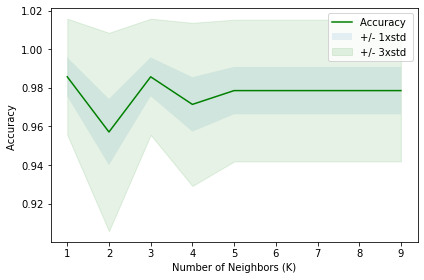

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [31]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9857142857142858 with k= 1
